In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
warnings.simplefilter(action='ignore', category= UserWarning)

In [2]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [4]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [5]:
dict_gender = {'Male': 1, 'Female': 0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

In [6]:
df['gender'].value_counts()

 1.0    16548
 0.0    11309
-1.0      525
Name: gender, dtype: int64

In [7]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
52.0        1
25.0        1
8.0         1
50.0        1
9.0         1
36.0        1
32.0        1
Name: dependents, dtype: int64

In [8]:
df['dependents']=df['dependents'].fillna(0)

In [9]:
df['dependents'].isnull().sum()

0

In [10]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [11]:
df['occupation']=df['occupation'].fillna('self_employed')

In [12]:
df['occupation'].isnull().sum()

0

In [13]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
1601.0       1
1093.0       1
1313.0       1
1391.0       1
1174.0       1
Name: city, Length: 1604, dtype: int64

In [14]:
df['city']=df['city'].fillna(1020)

In [15]:
df['city'].isnull().sum()

0

In [16]:
df['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
288.0       1
92.0        1
321.0       1
134.0       1
225.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [17]:
df['days_since_last_transaction']=df['days_since_last_transaction'].fillna(999)

In [18]:
df['days_since_last_transaction'].isnull().sum()

0

In [19]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [20]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


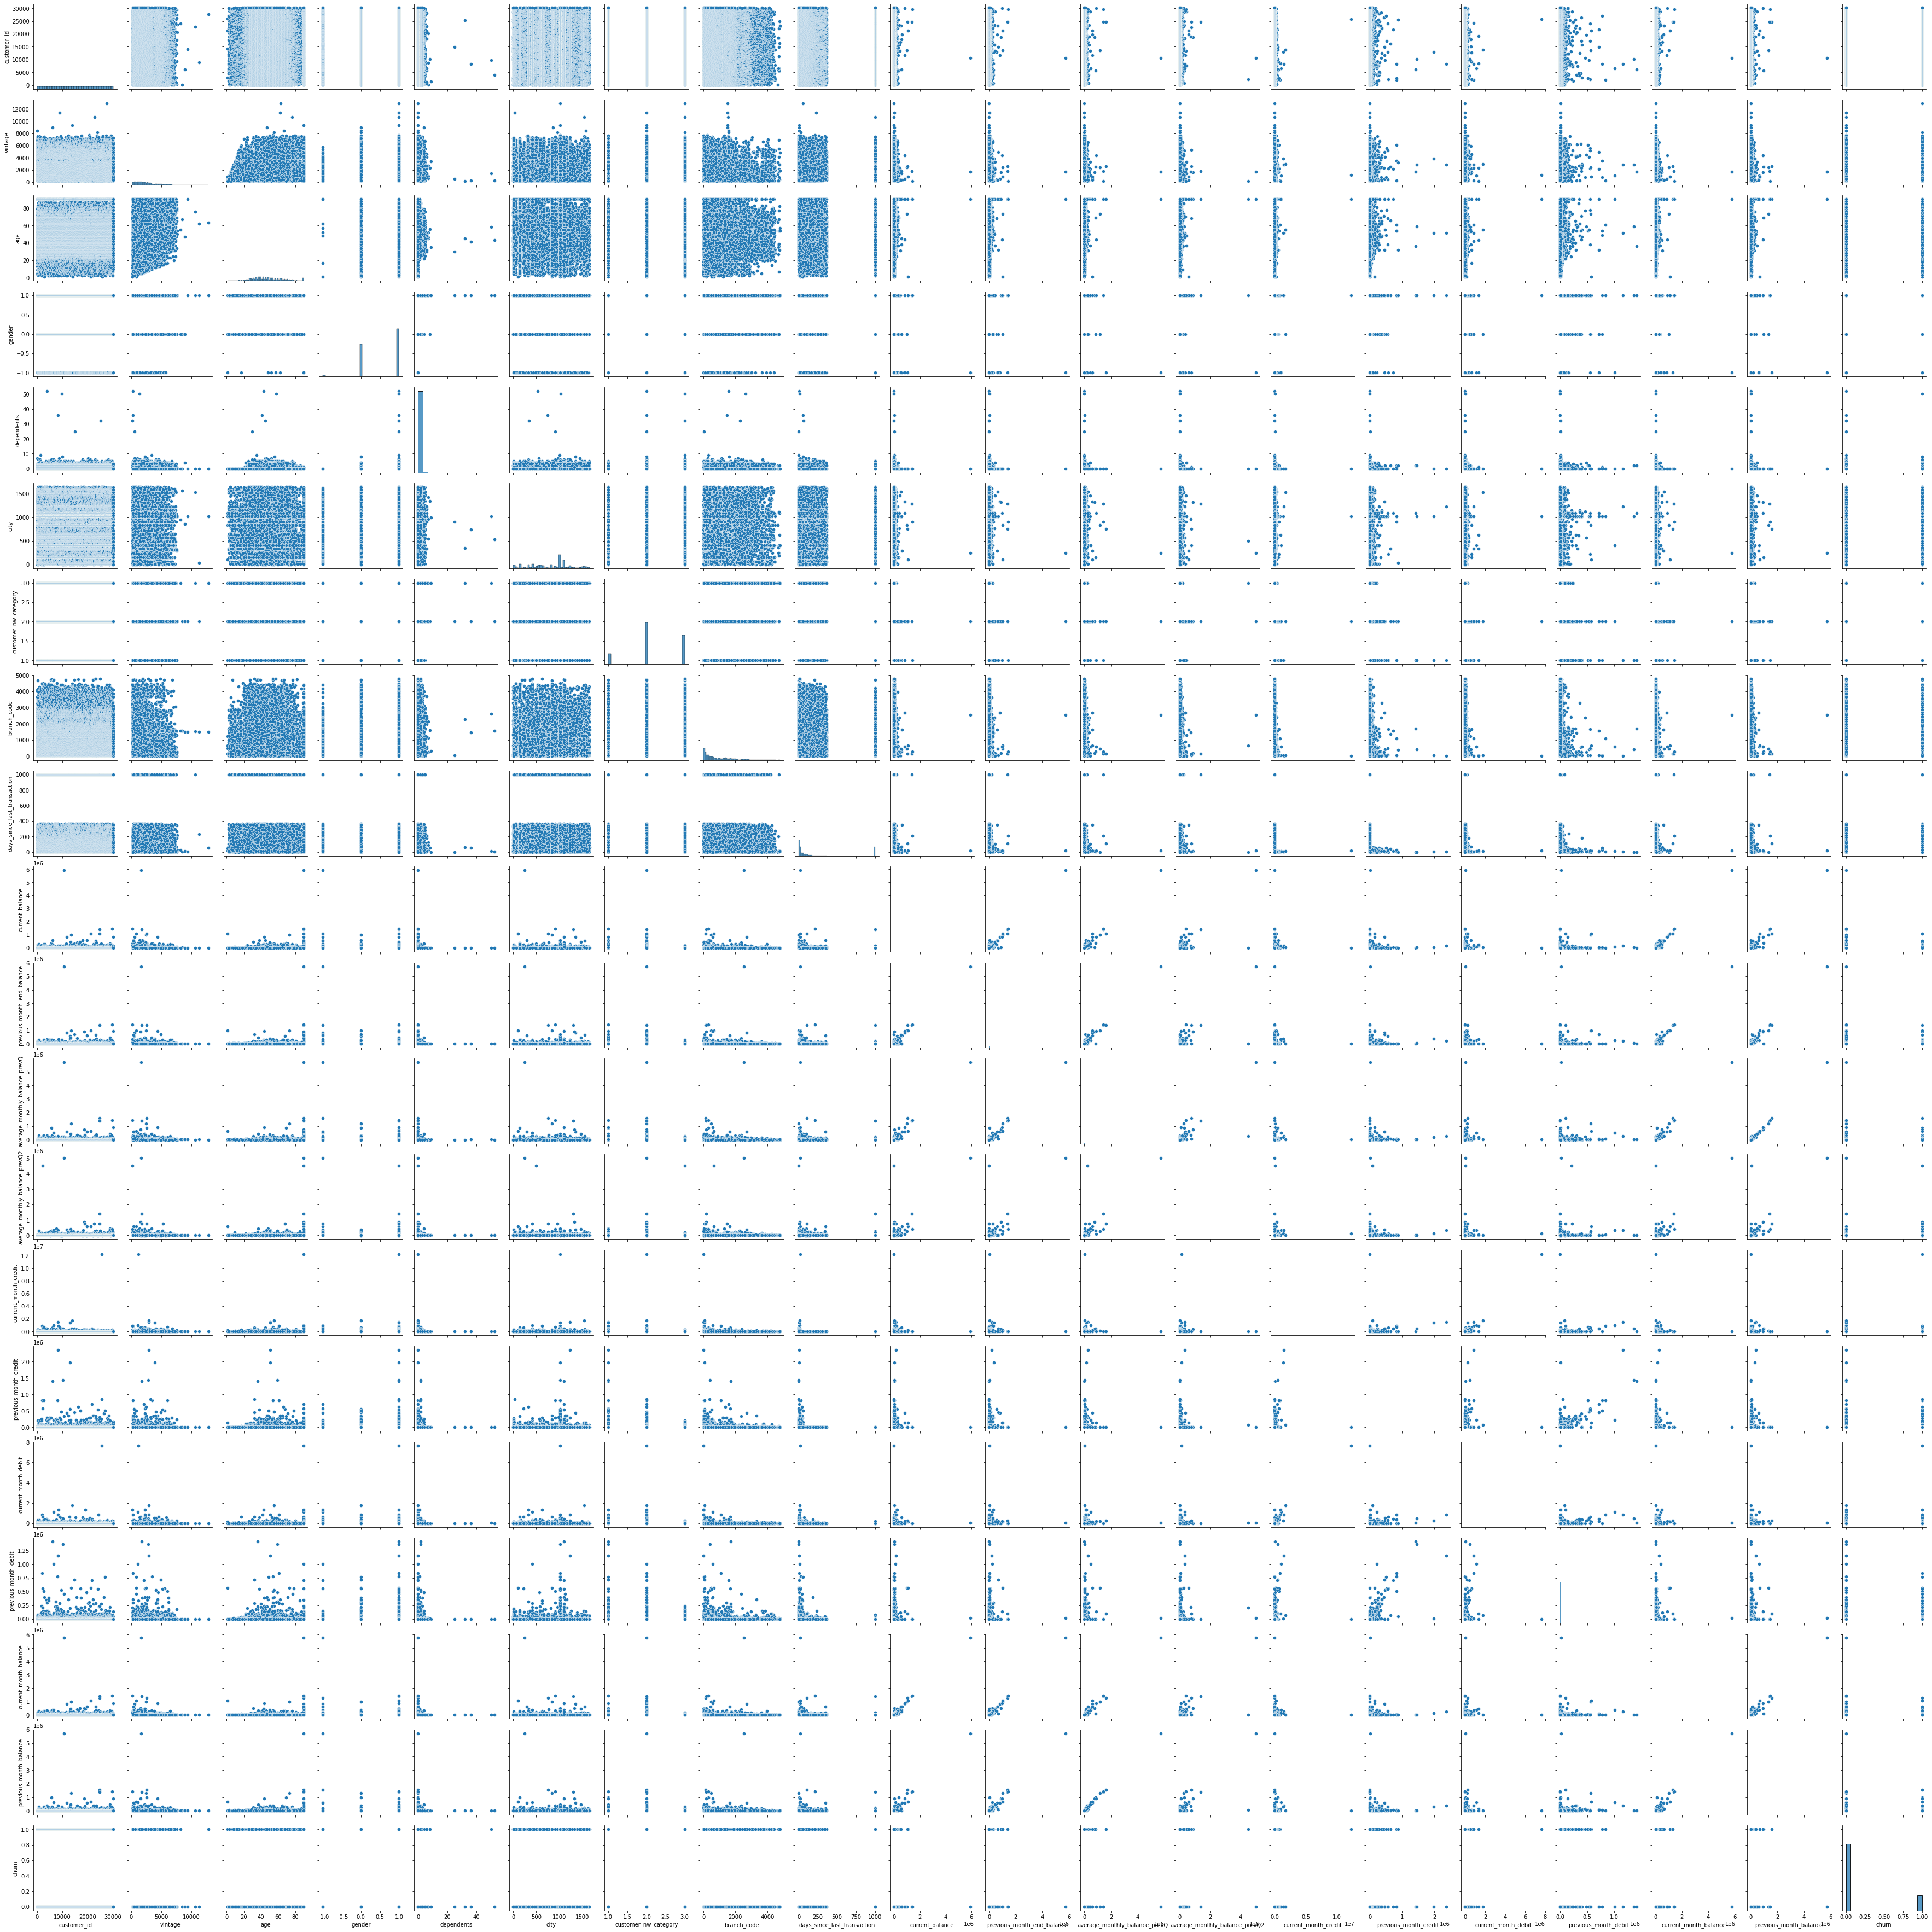

In [21]:
sns.pairplot(df)